# Regresión con varios algoritmos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Densidad de Rocas

Los datos corresponden al uso de rayos-X para la detección de la densidad de rocas.

In [2]:
df = pd.read_csv("rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns=['Señal','Densidad']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Señal     300 non-null    float64
 1   Densidad  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


<Axes: xlabel='Señal', ylabel='Densidad'>

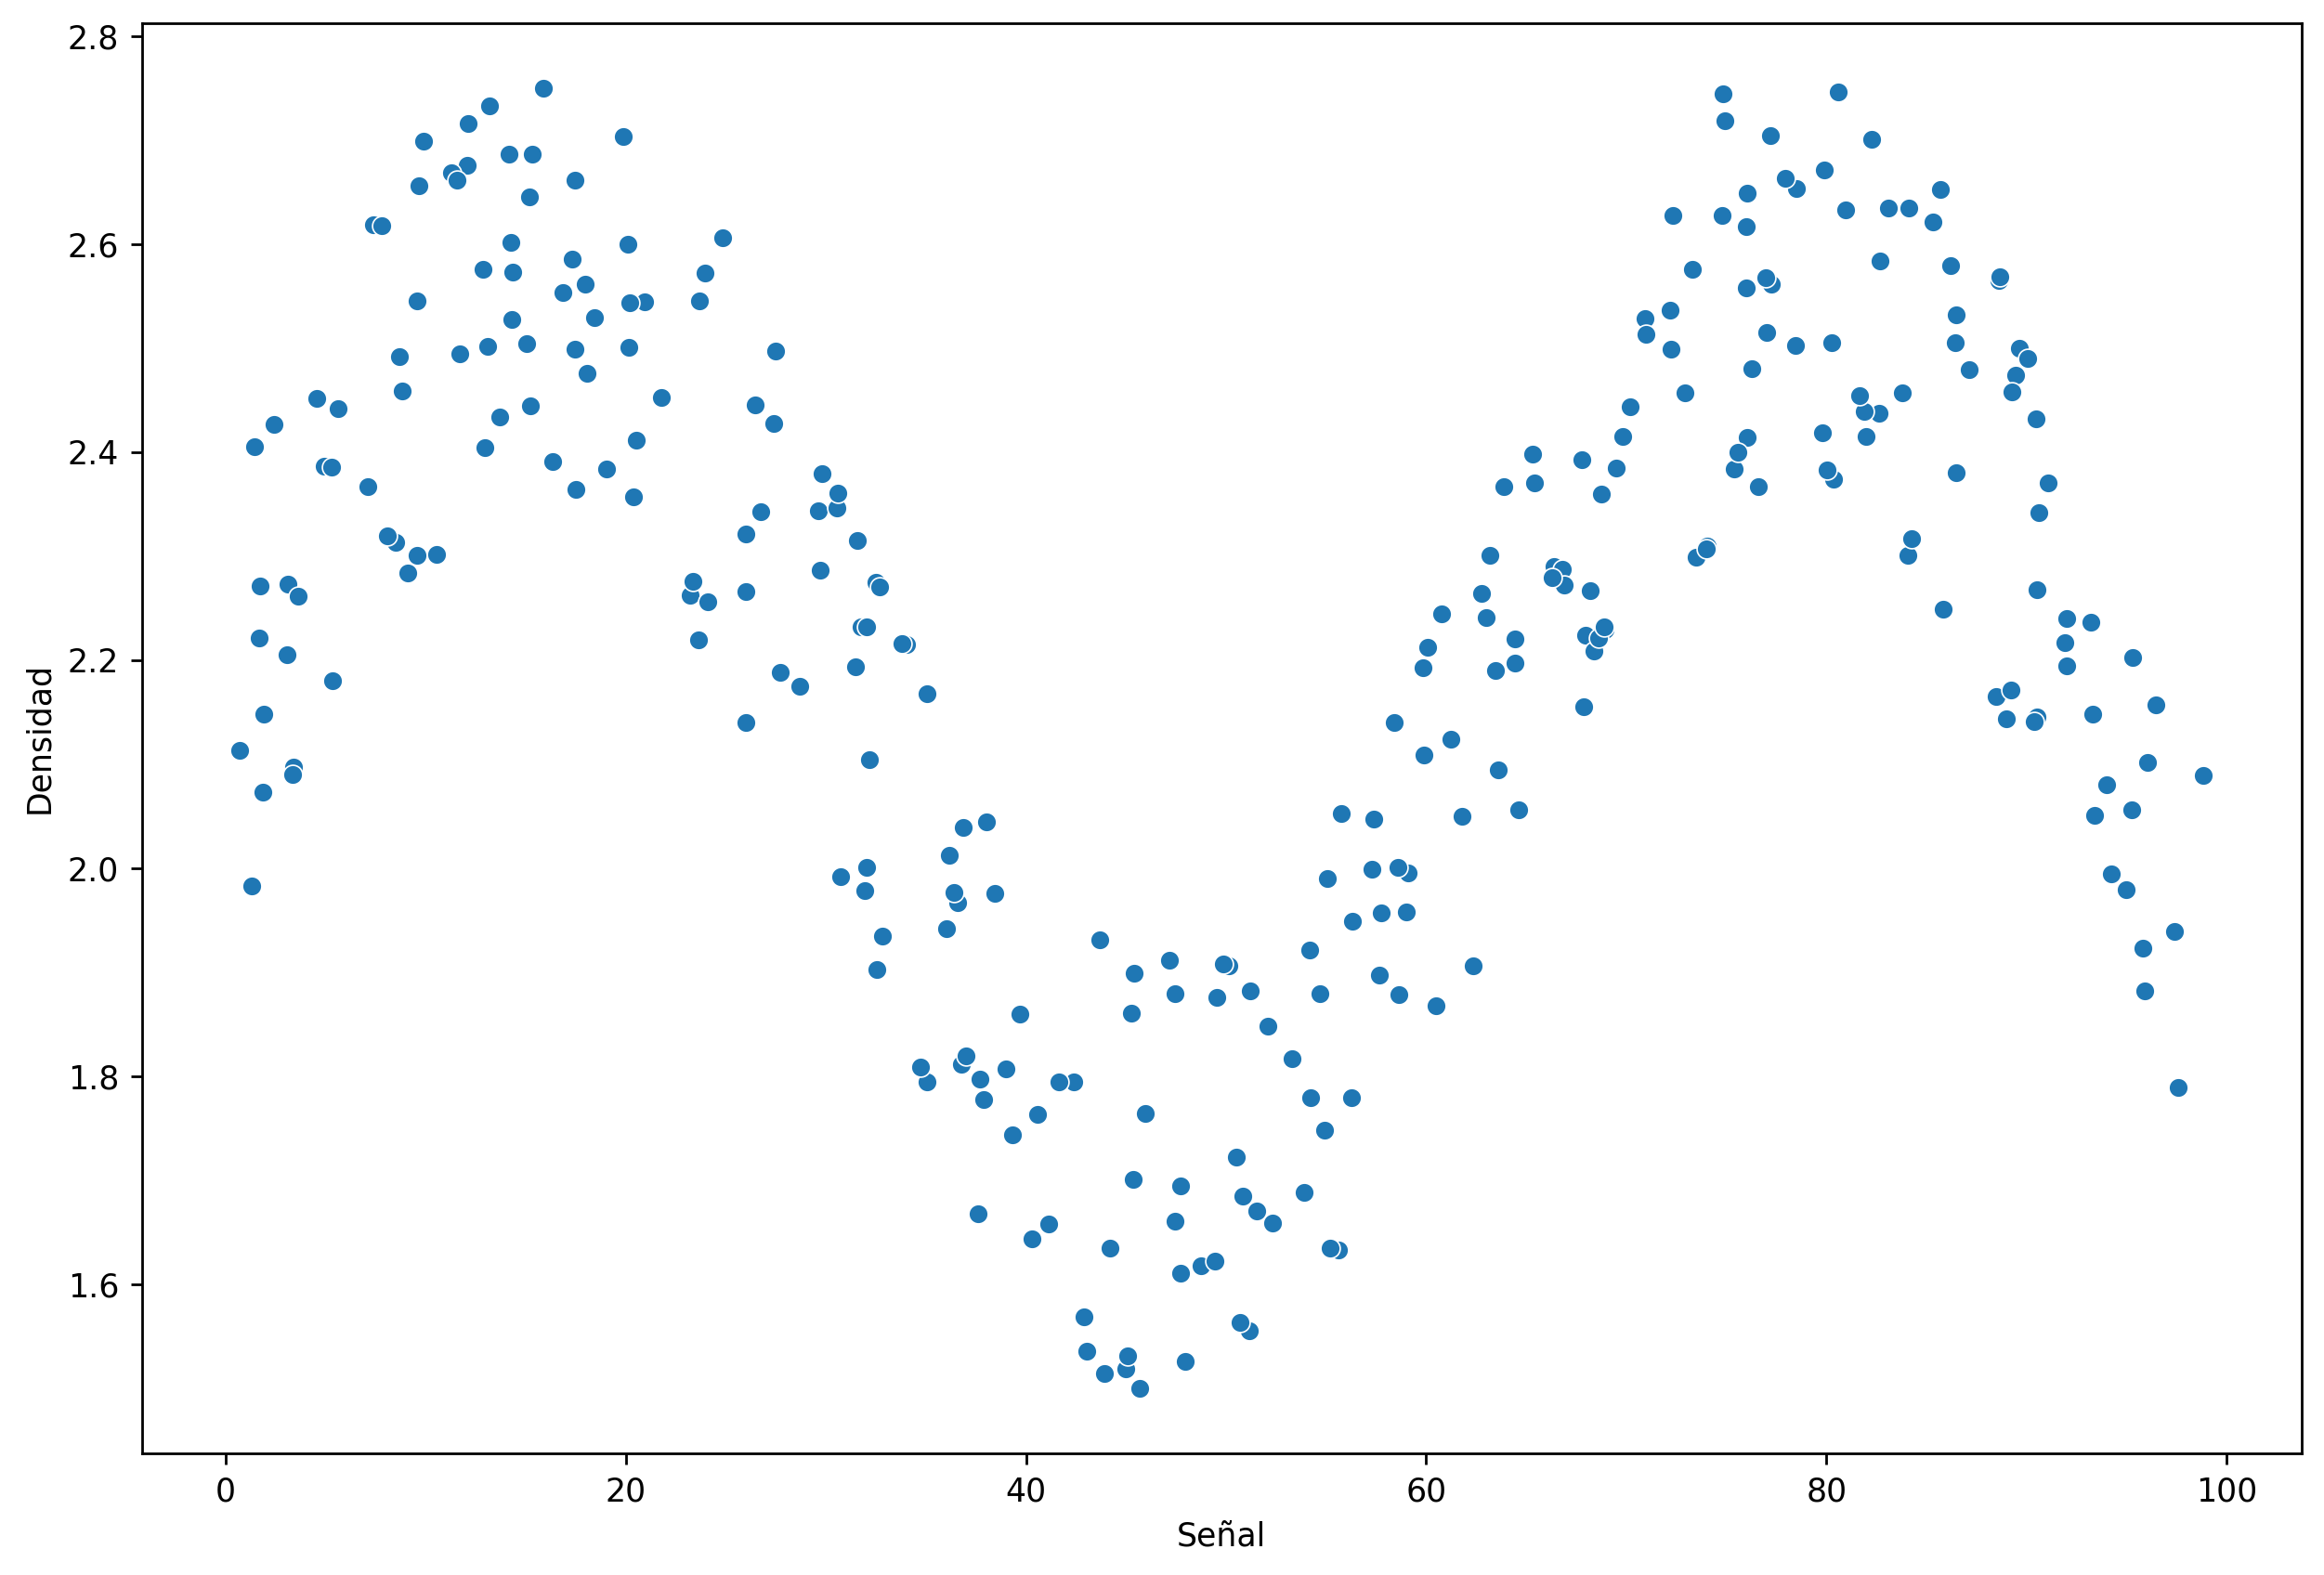

In [6]:
plt.figure(figsize=(12,8),dpi=250)
sns.scatterplot(x='Señal',y='Densidad',data=df)

### División en Conjunto de entrenamiento y prueba

In [7]:
X = df['Señal']

In [8]:
X

0      72.945124
1      14.229877
2      36.597334
3       9.578899
4      21.765897
         ...    
295     0.700227
296    58.586585
297    54.674548
298    15.162434
299    38.020267
Name: Señal, Length: 300, dtype: float64

In [9]:
type(X)

pandas.core.series.Series

In [10]:
X = df['Señal'].values.reshape(-1,1)

In [11]:
# Los 5 primeros registros
X[0:5]

array([[72.94512436],
       [14.2298772 ],
       [36.59733361],
       [ 9.57889939],
       [21.76589708]])

In [12]:
type(X)

numpy.ndarray

Se requiere un arreglo como entrada

In [13]:
y = df['Densidad']

In [14]:
type(y)

pandas.core.series.Series

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=101)

# Regresión Lineal

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
modelo_rl = LinearRegression()

In [19]:
modelo_rl.fit(X_train,y_train)

LinearRegression()

In [20]:
pred_rl = modelo_rl.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
# RMSE
np.sqrt(mean_squared_error(y_test,pred_rl))

0.29913137925459526

Gráfico del modelo realizado

In [23]:
rango_senal = np.arange(0,101)

In [24]:
rango_senal

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [25]:
salidad_rl = modelo_rl.predict(rango_senal.reshape(-1,1))

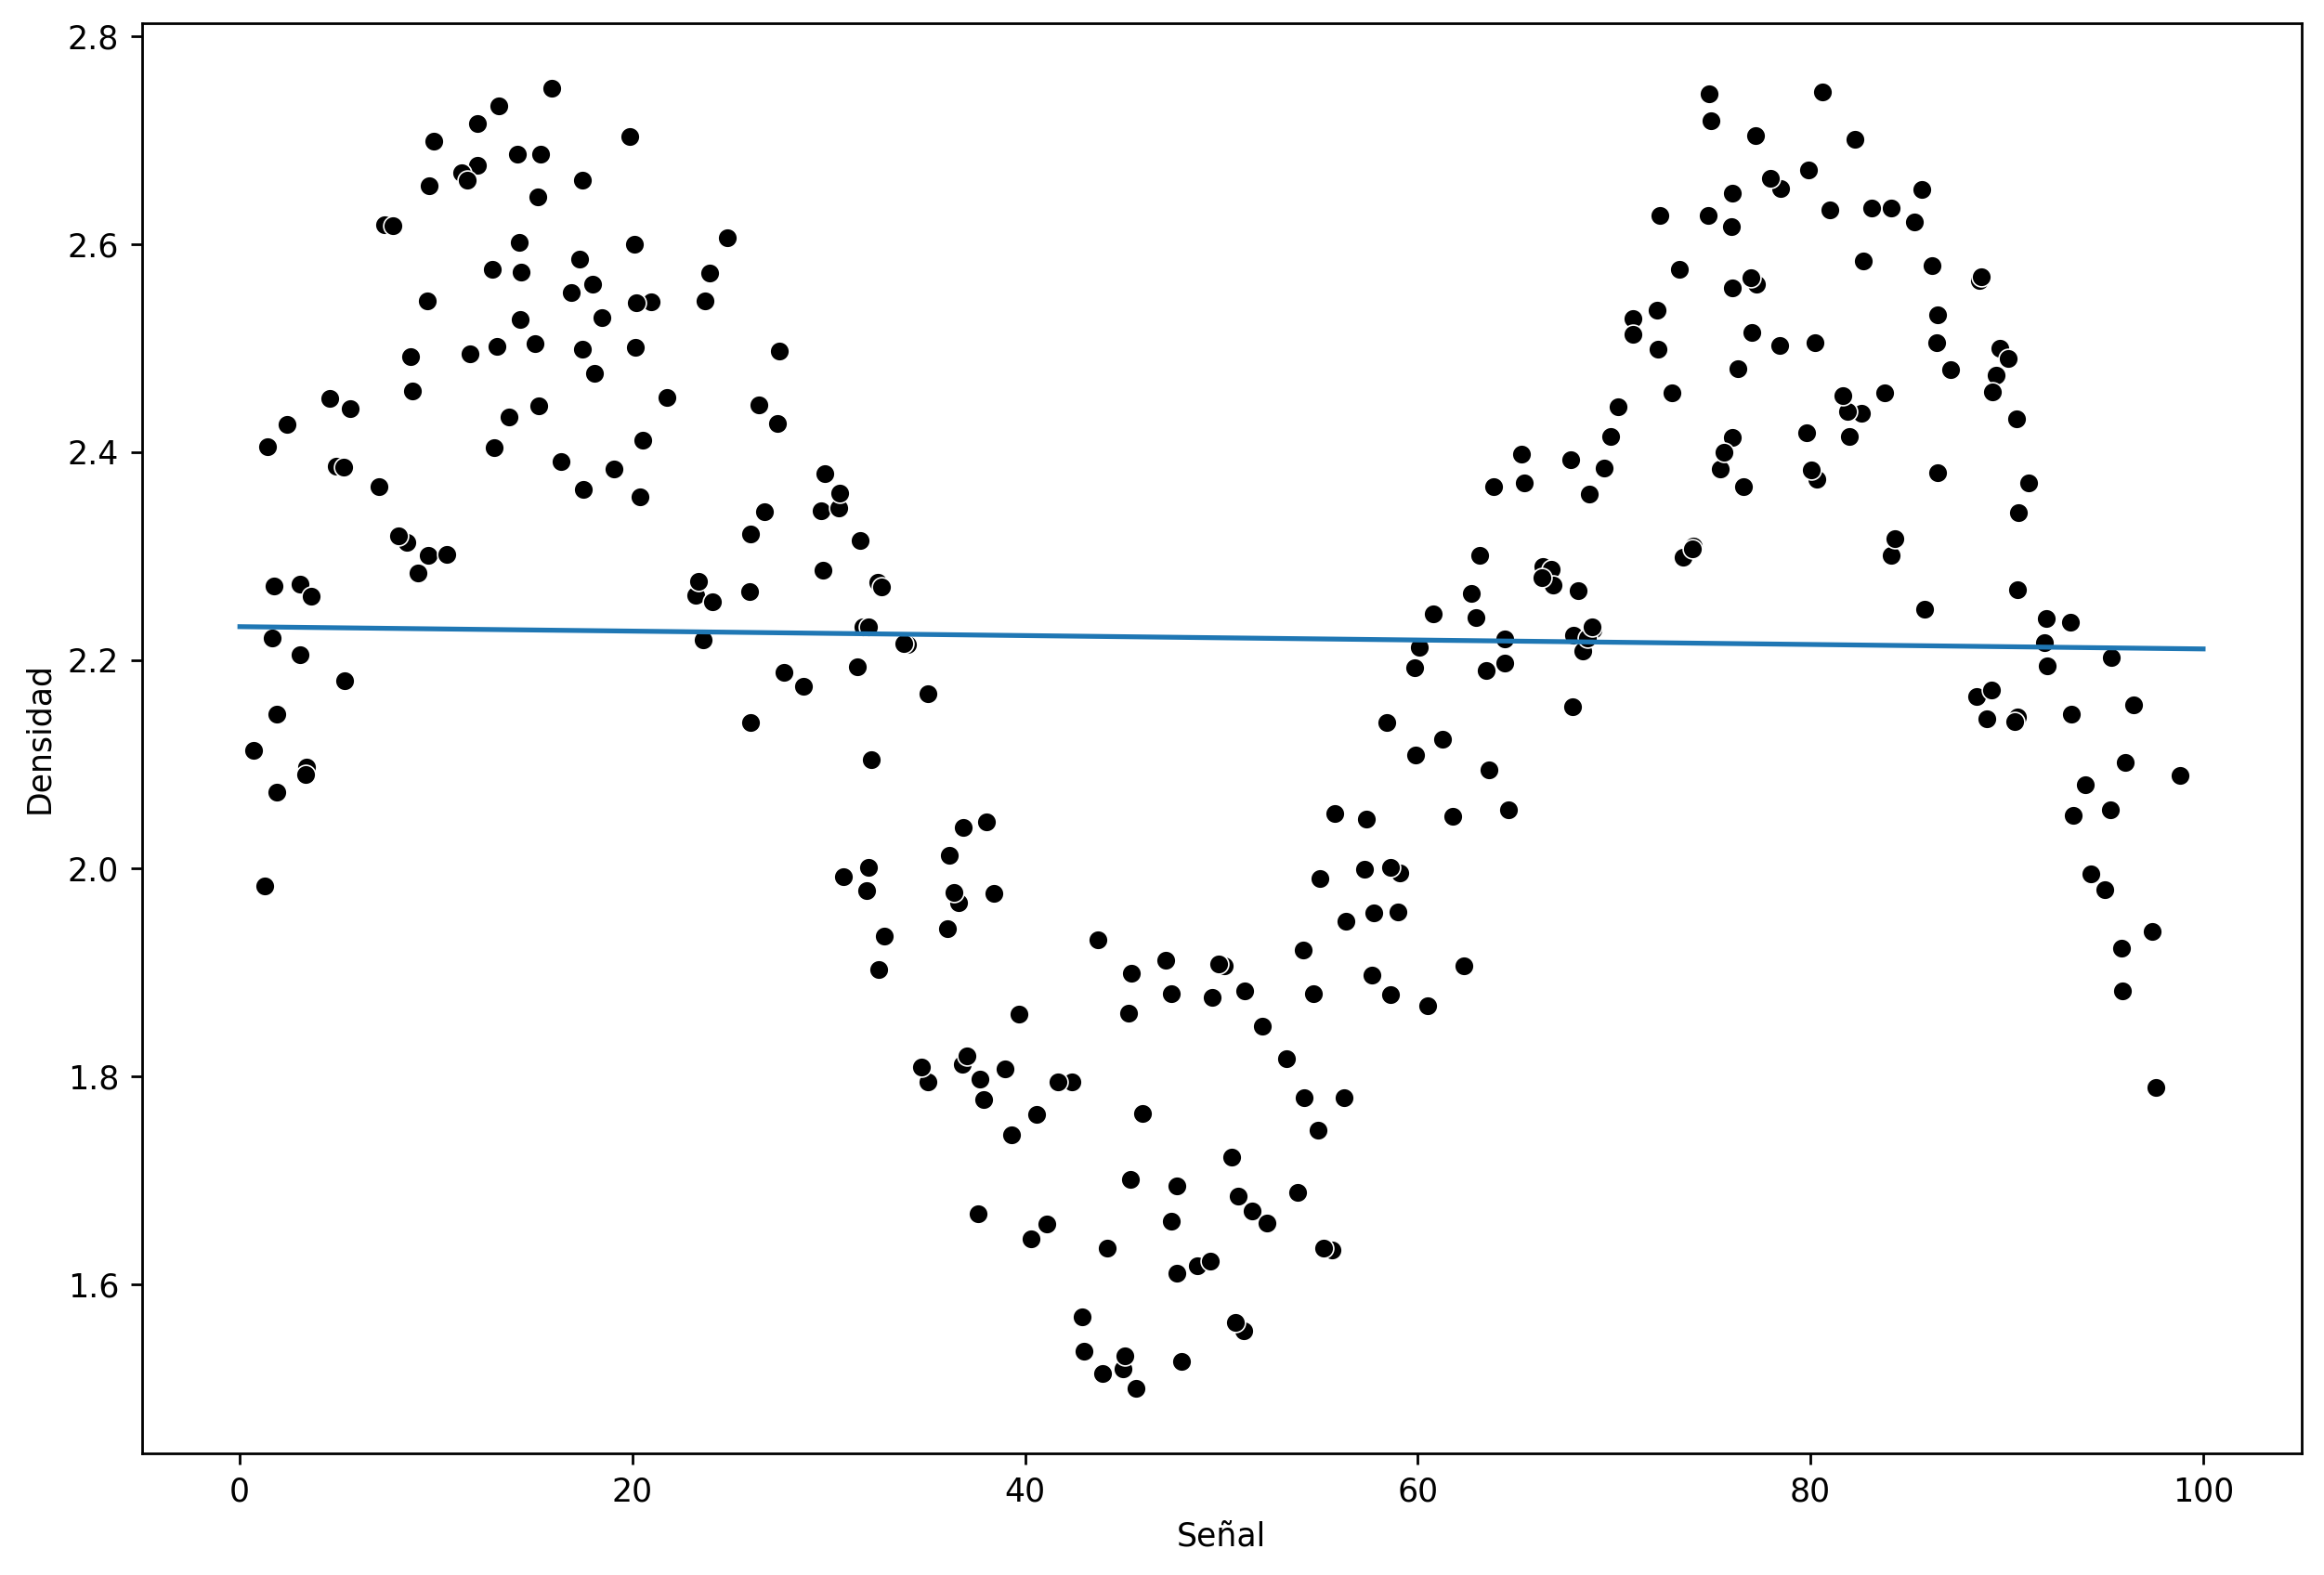

In [26]:
plt.figure(figsize=(12,8),dpi=250)
sns.scatterplot(x = 'Señal', y = 'Densidad', data=df, color='black')
plt.plot(rango_senal,salidad_rl)

# Función para ejecutar modelos

In [27]:
def ejecutar_modelo(modelo, X_train, y_train, X_test, y_test):
    #crea el modelo, lo entrena y evalua
    modelo.fit(X_train, y_train)
    preds = modelo.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print('RMSE: %.4f'%(rmse))
    
    #graficar los resultados
    rango_senal = np.arange(0,101)
    salida = modelo.predict(rango_senal.reshape(-1,1))
    plt.figure(figsize=(12,6),dpi=200)
    sns.scatterplot(x='Señal',y='Densidad',data=df,color='black')
    plt.plot(rango_senal,salida)    

# Regresión con características Polinomiales

In [28]:
# modelo de Regresión Lineal
modelo = LinearRegression()

RMSE: 0.2991


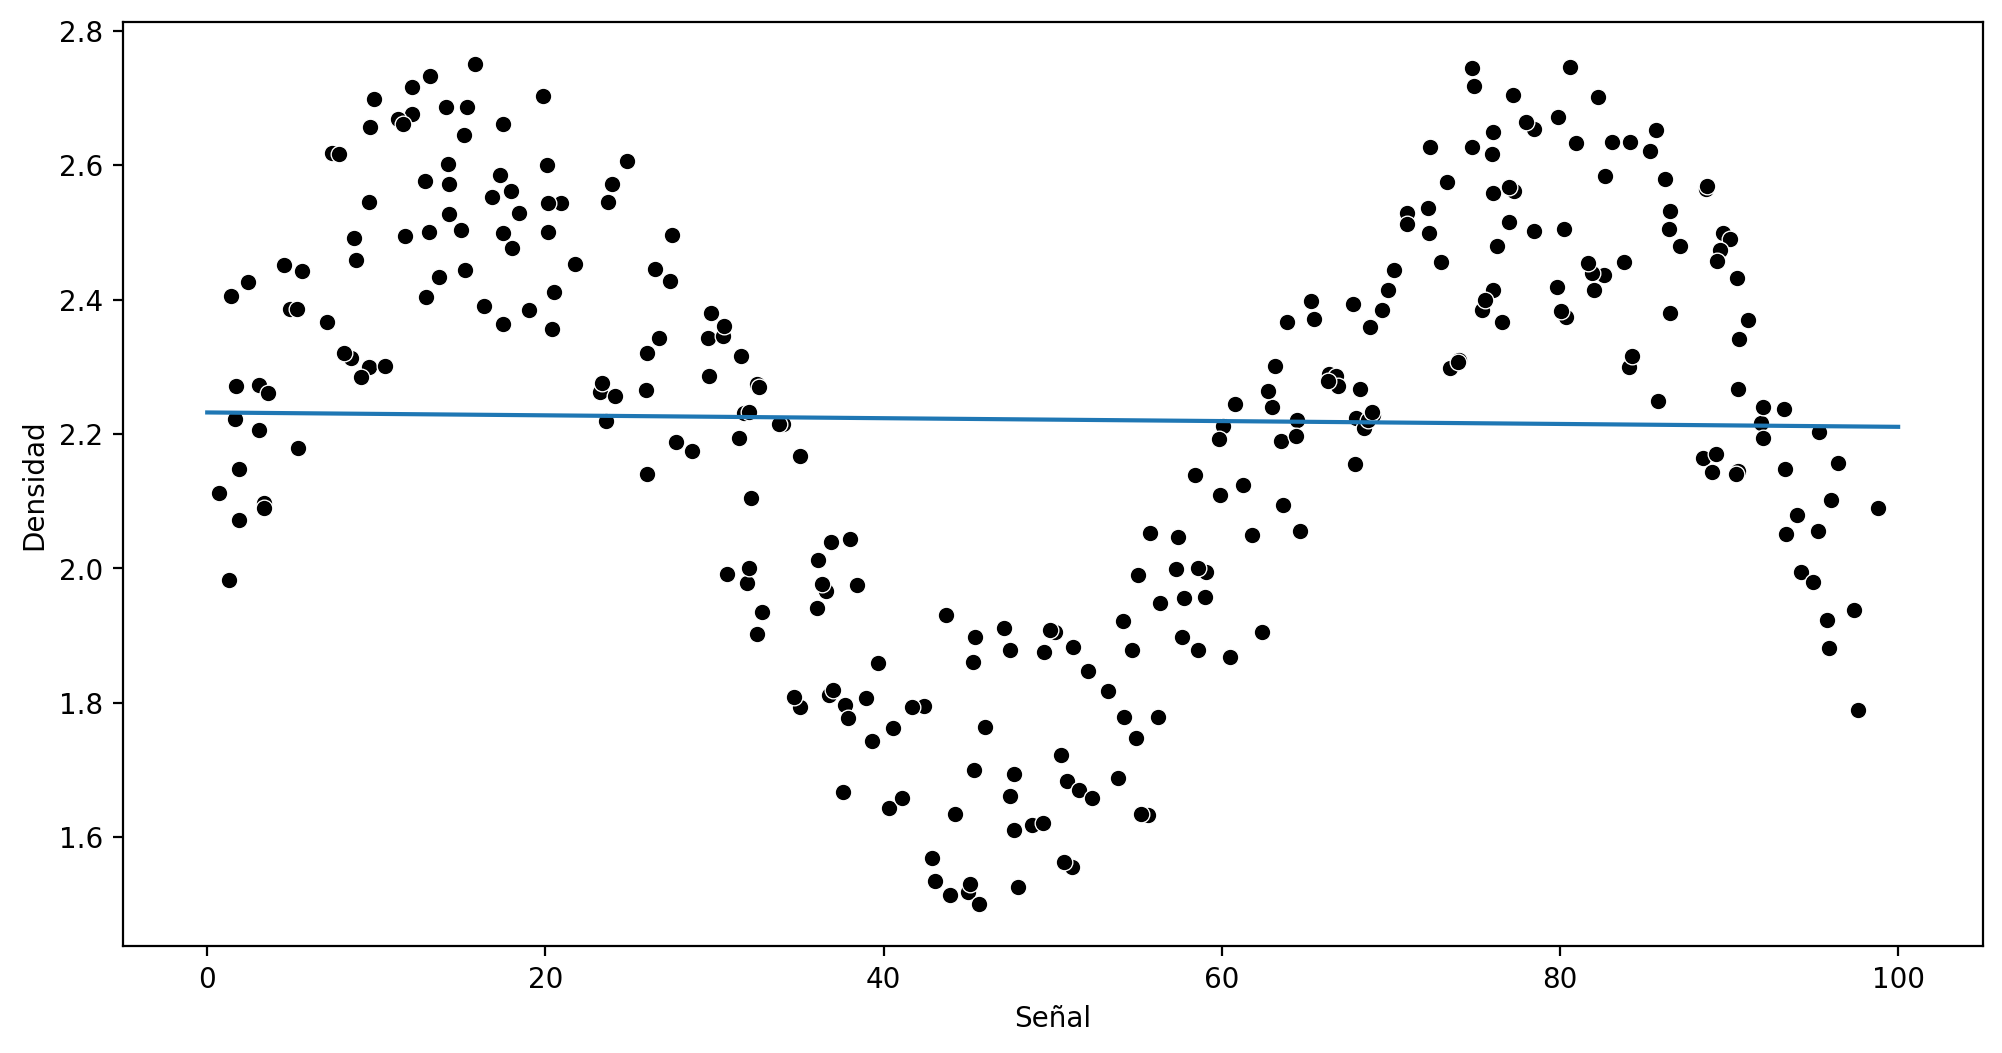

In [29]:
ejecutar_modelo(modelo,X_train, y_train, X_test, y_test)

### Canalización (Pipeline) para características polinómicas

In [30]:
from sklearn.pipeline import make_pipeline

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
canal = make_pipeline(PolynomialFeatures(2),LinearRegression())

RMSE: 0.2877


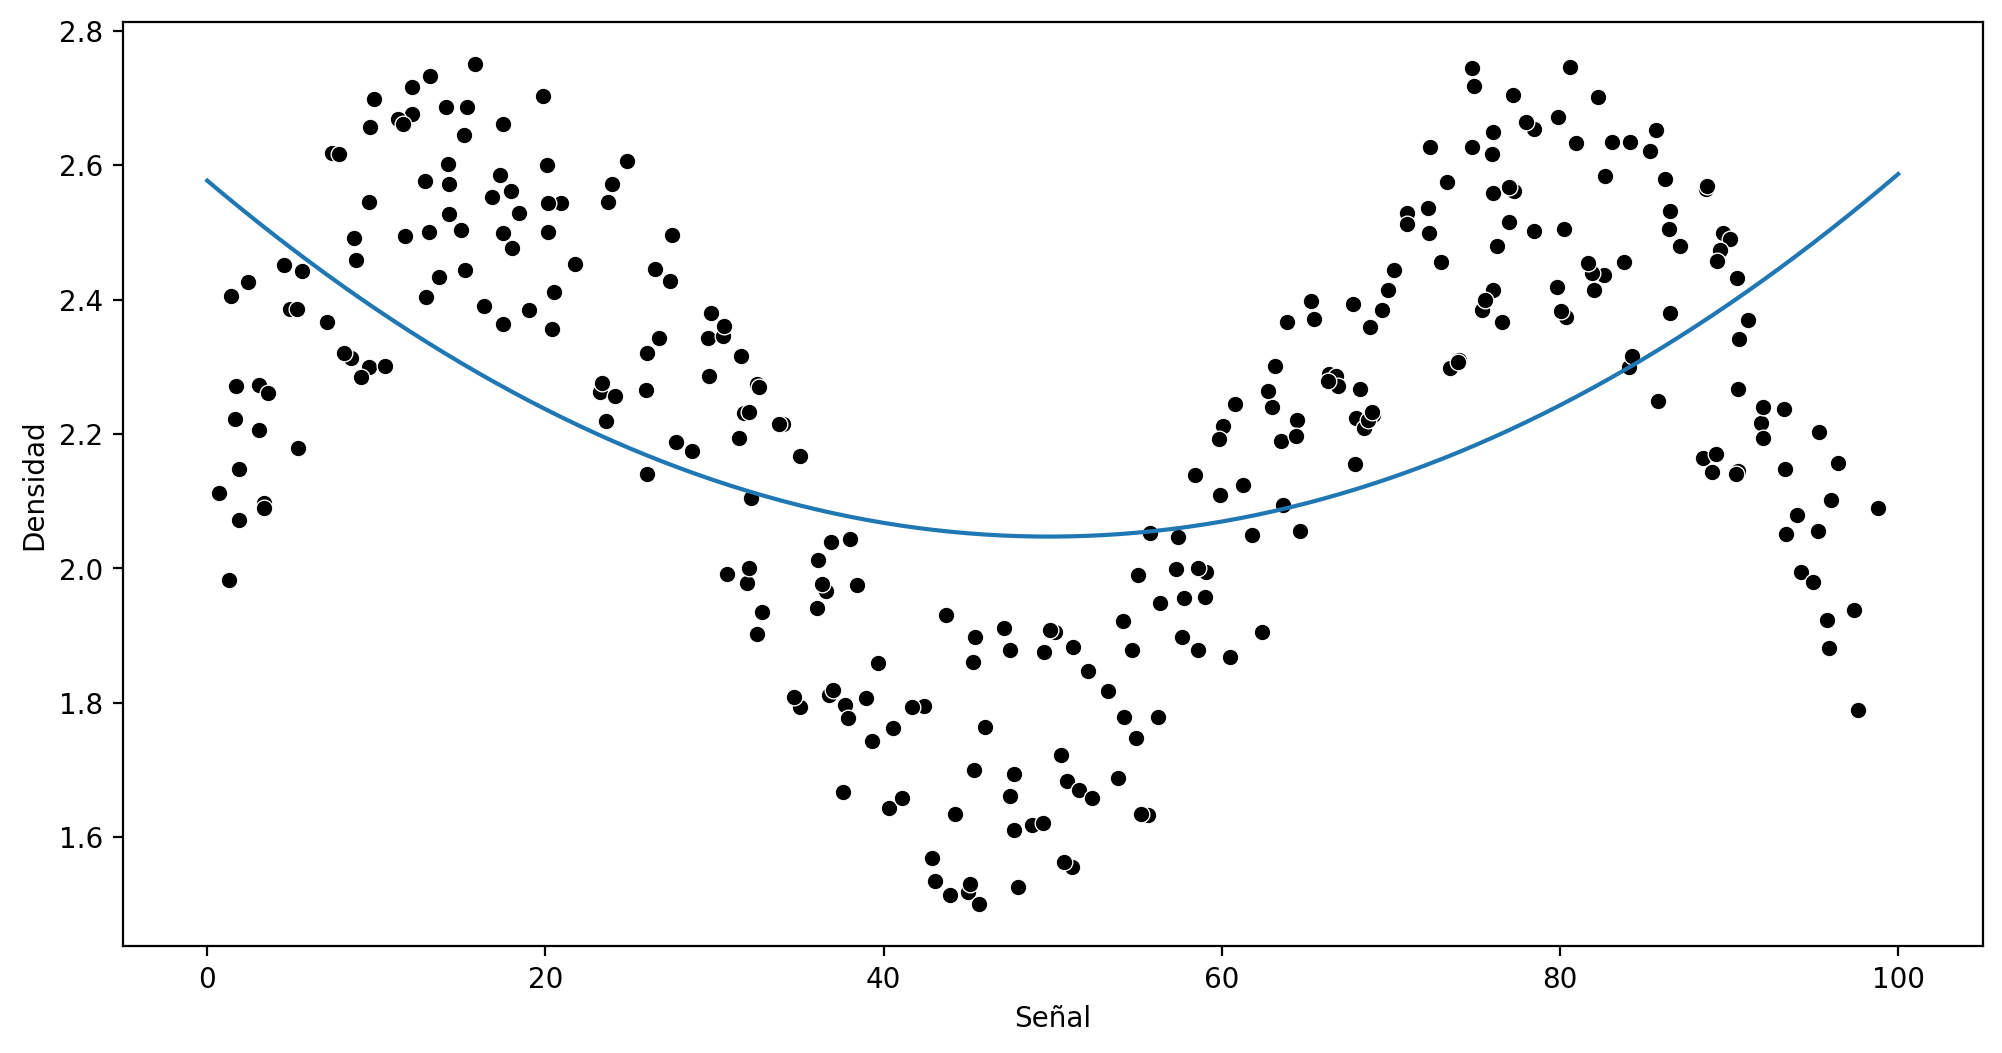

In [33]:
ejecutar_modelo(canal,X_train, y_train, X_test, y_test)

Aumentamos el orden

In [34]:
canal = make_pipeline(PolynomialFeatures(10),LinearRegression())

RMSE: 0.1406


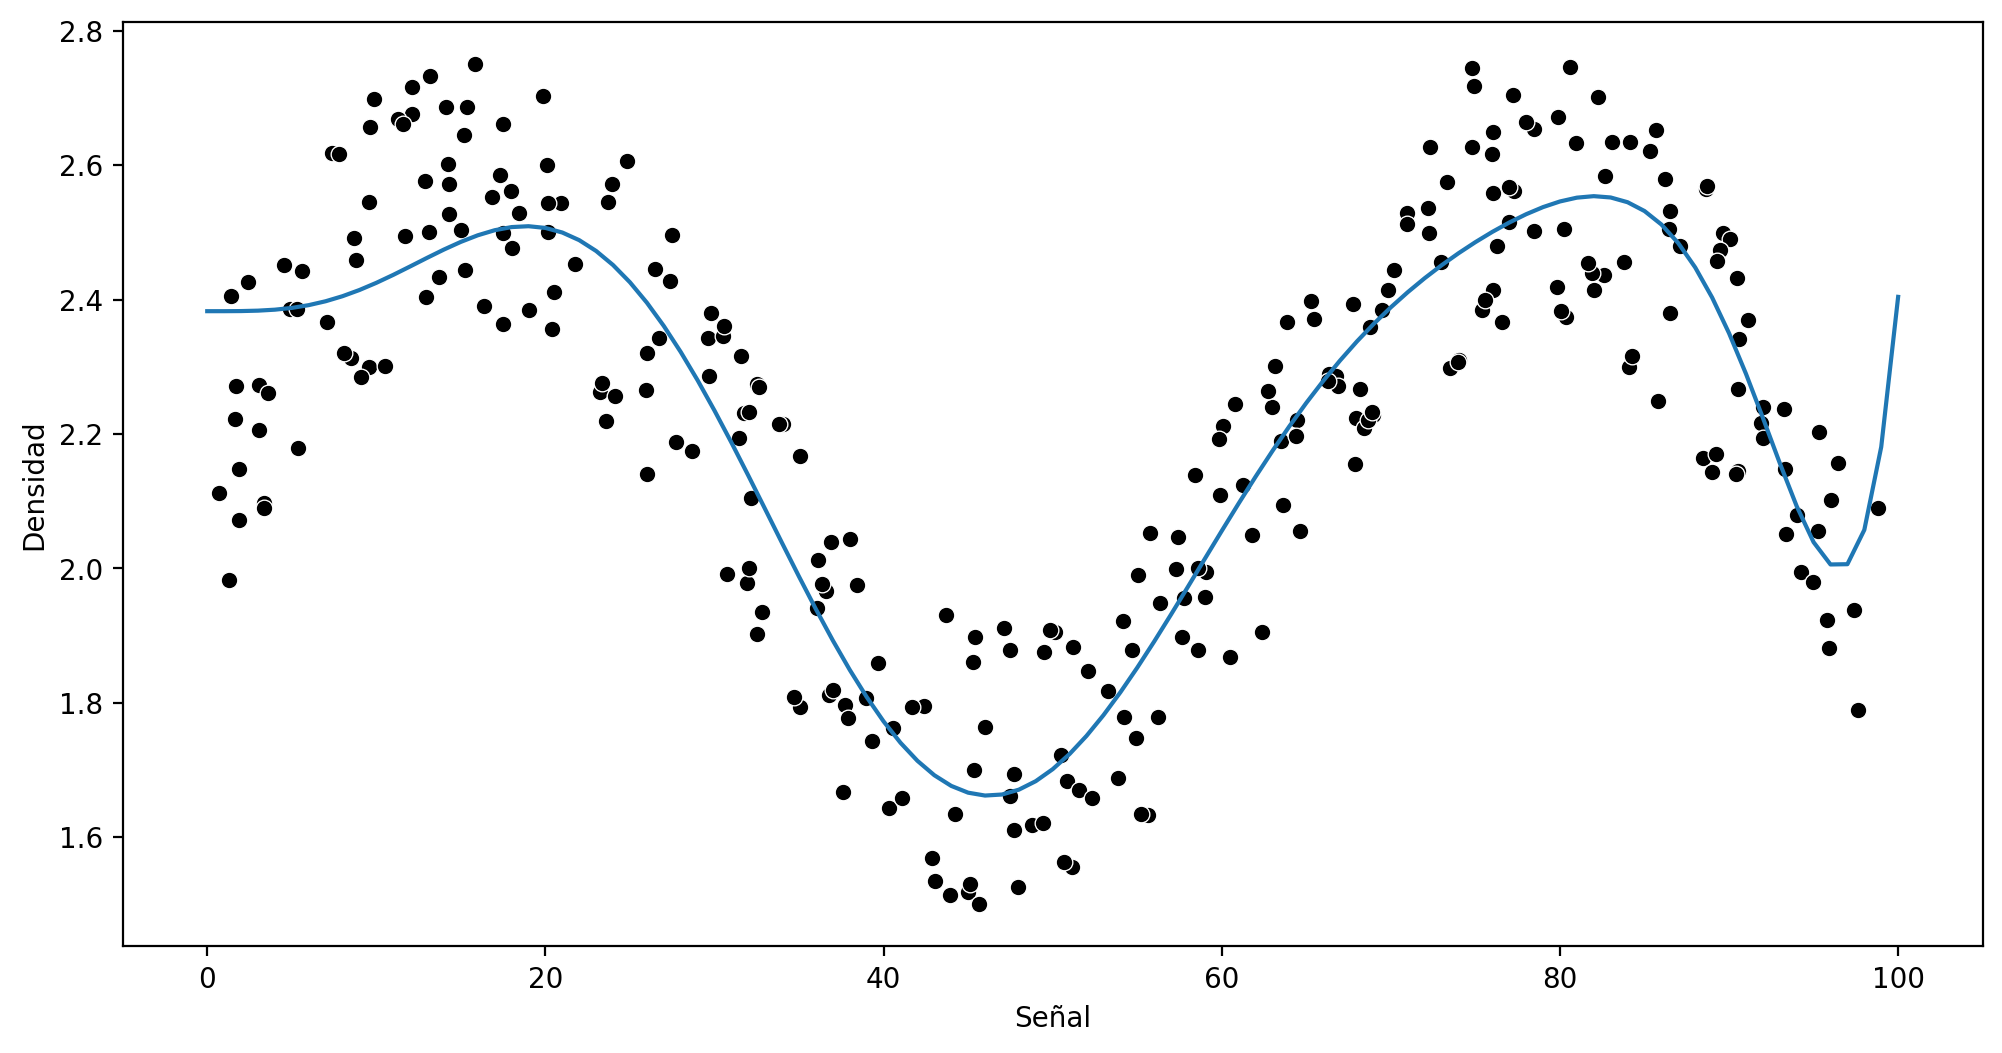

In [35]:
ejecutar_modelo(canal,X_train, y_train, X_test, y_test)

# Regresión KNN

In [36]:
from sklearn.neighbors import KNeighborsRegressor

RMSE: 0.1661
RMSE: 0.1425
RMSE: 0.1374
RMSE: 0.1400


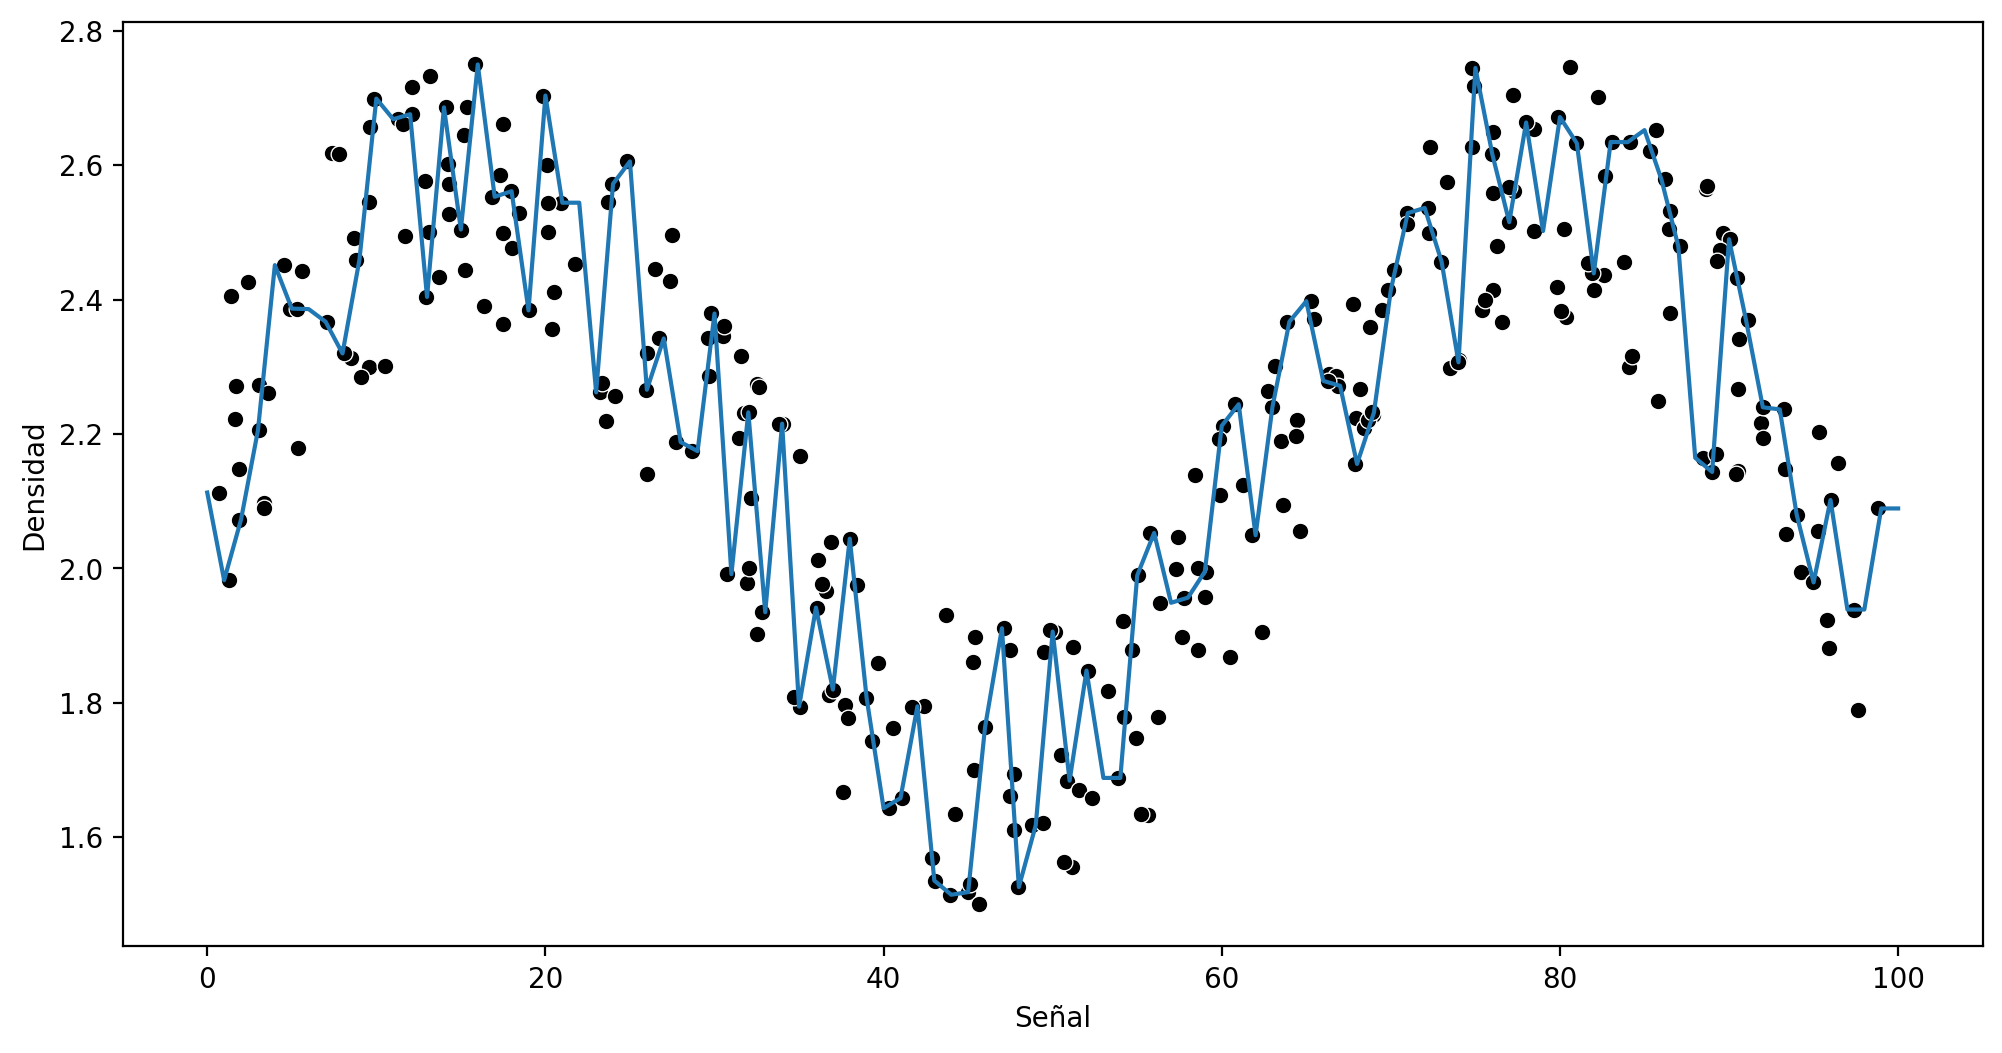

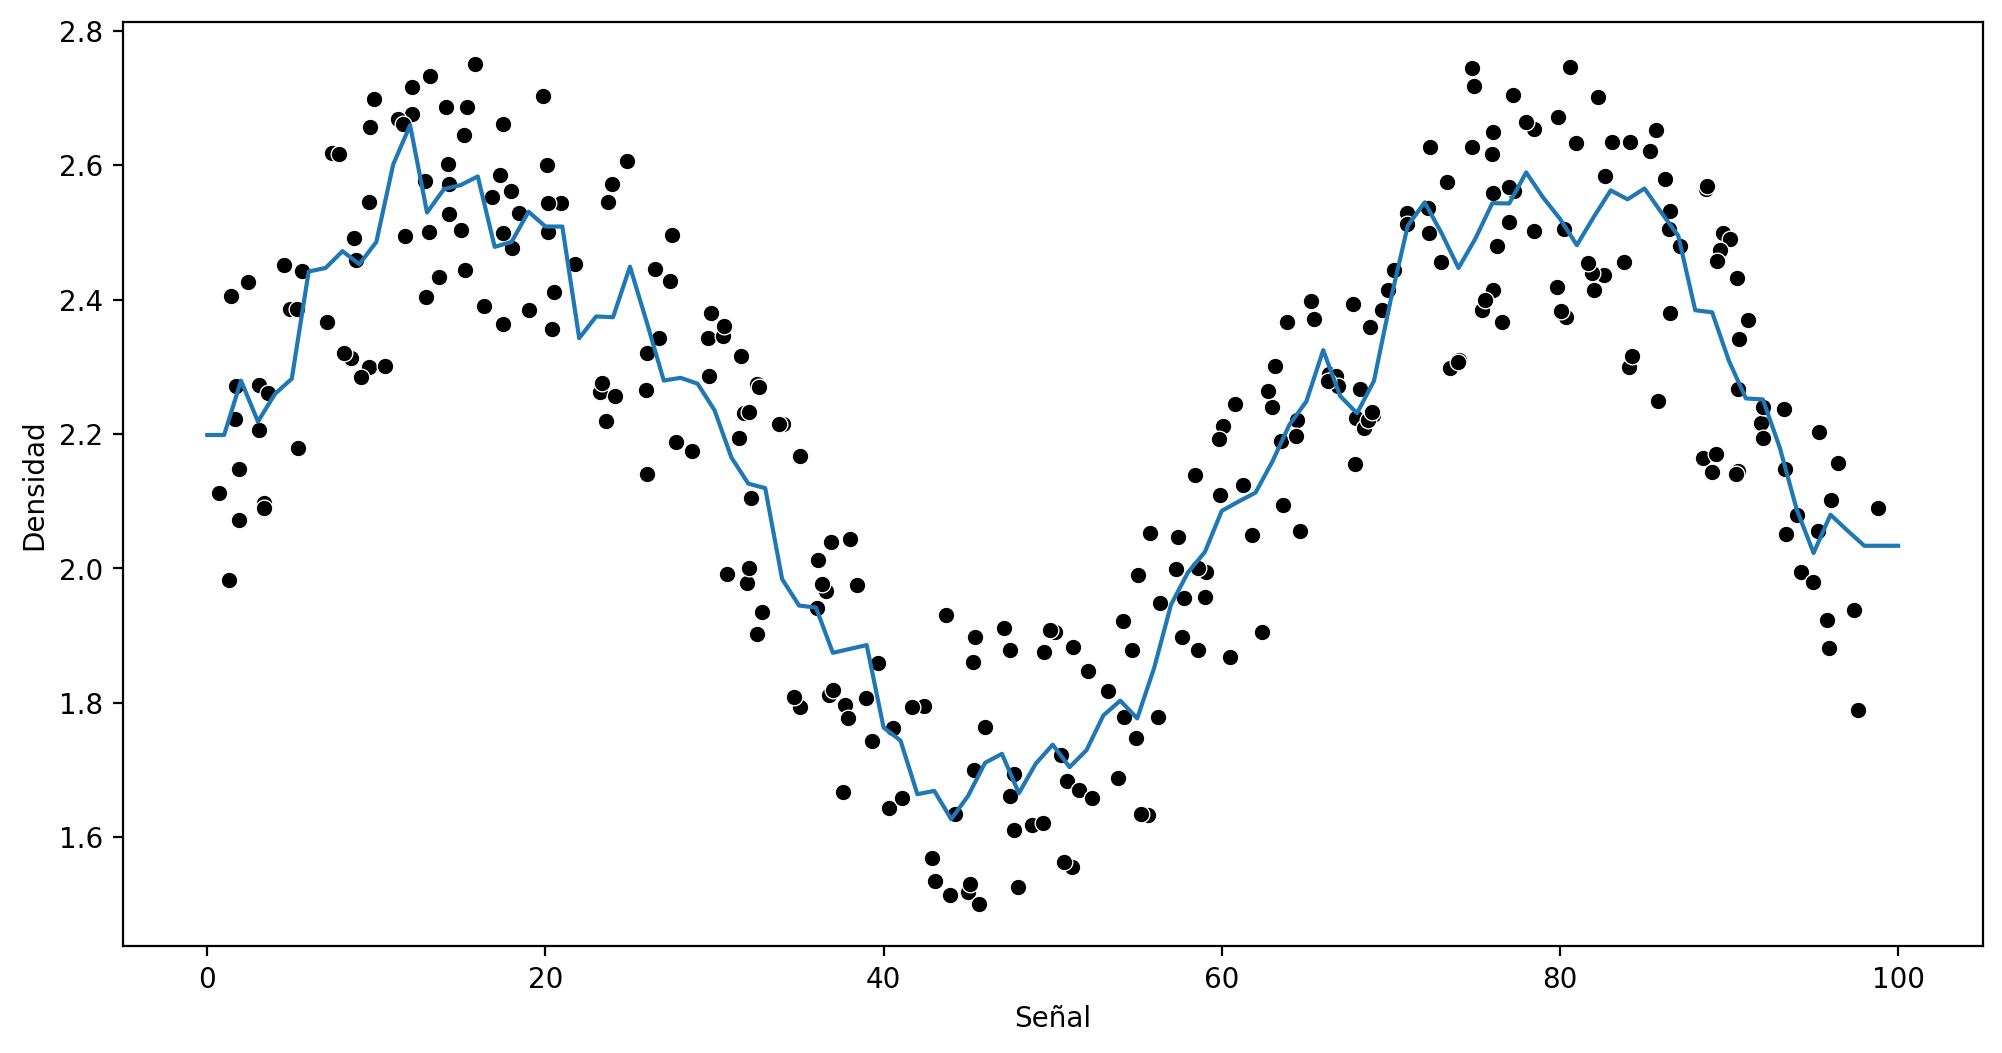

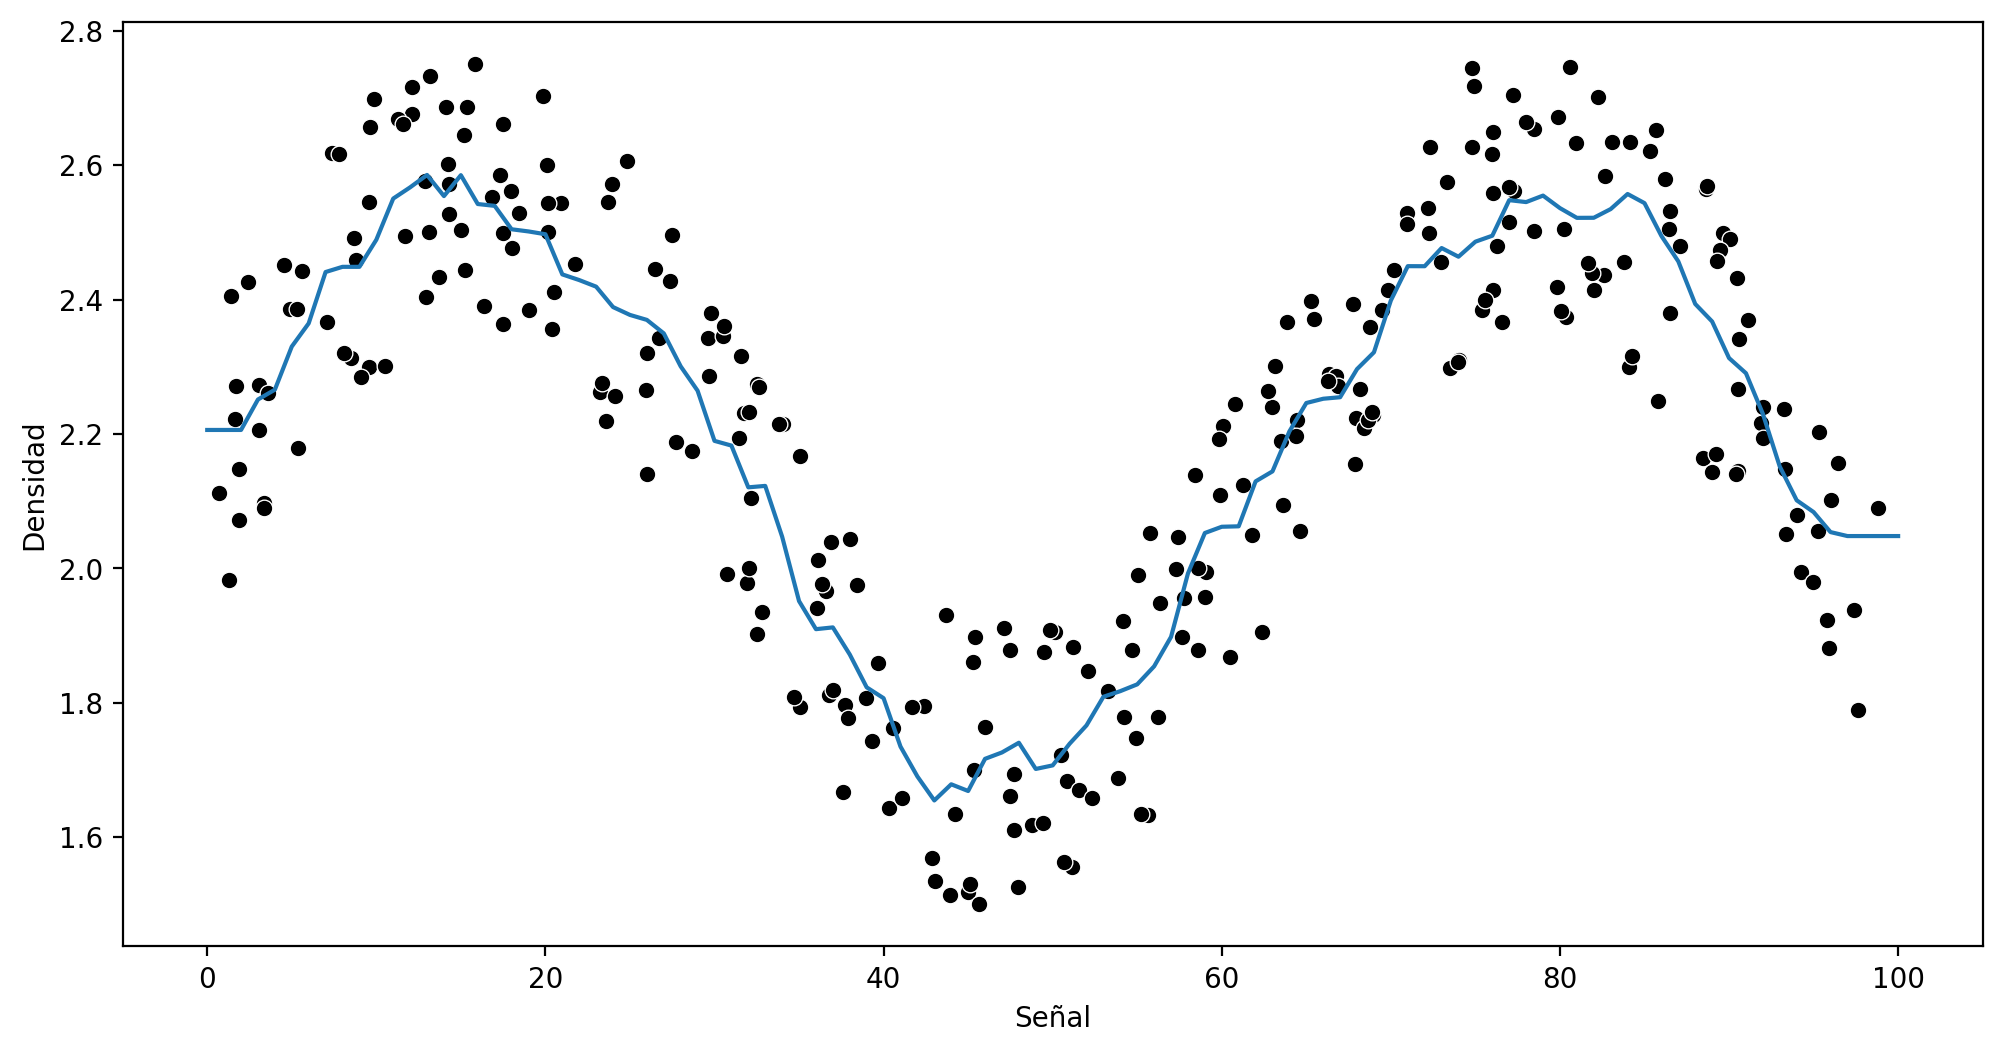

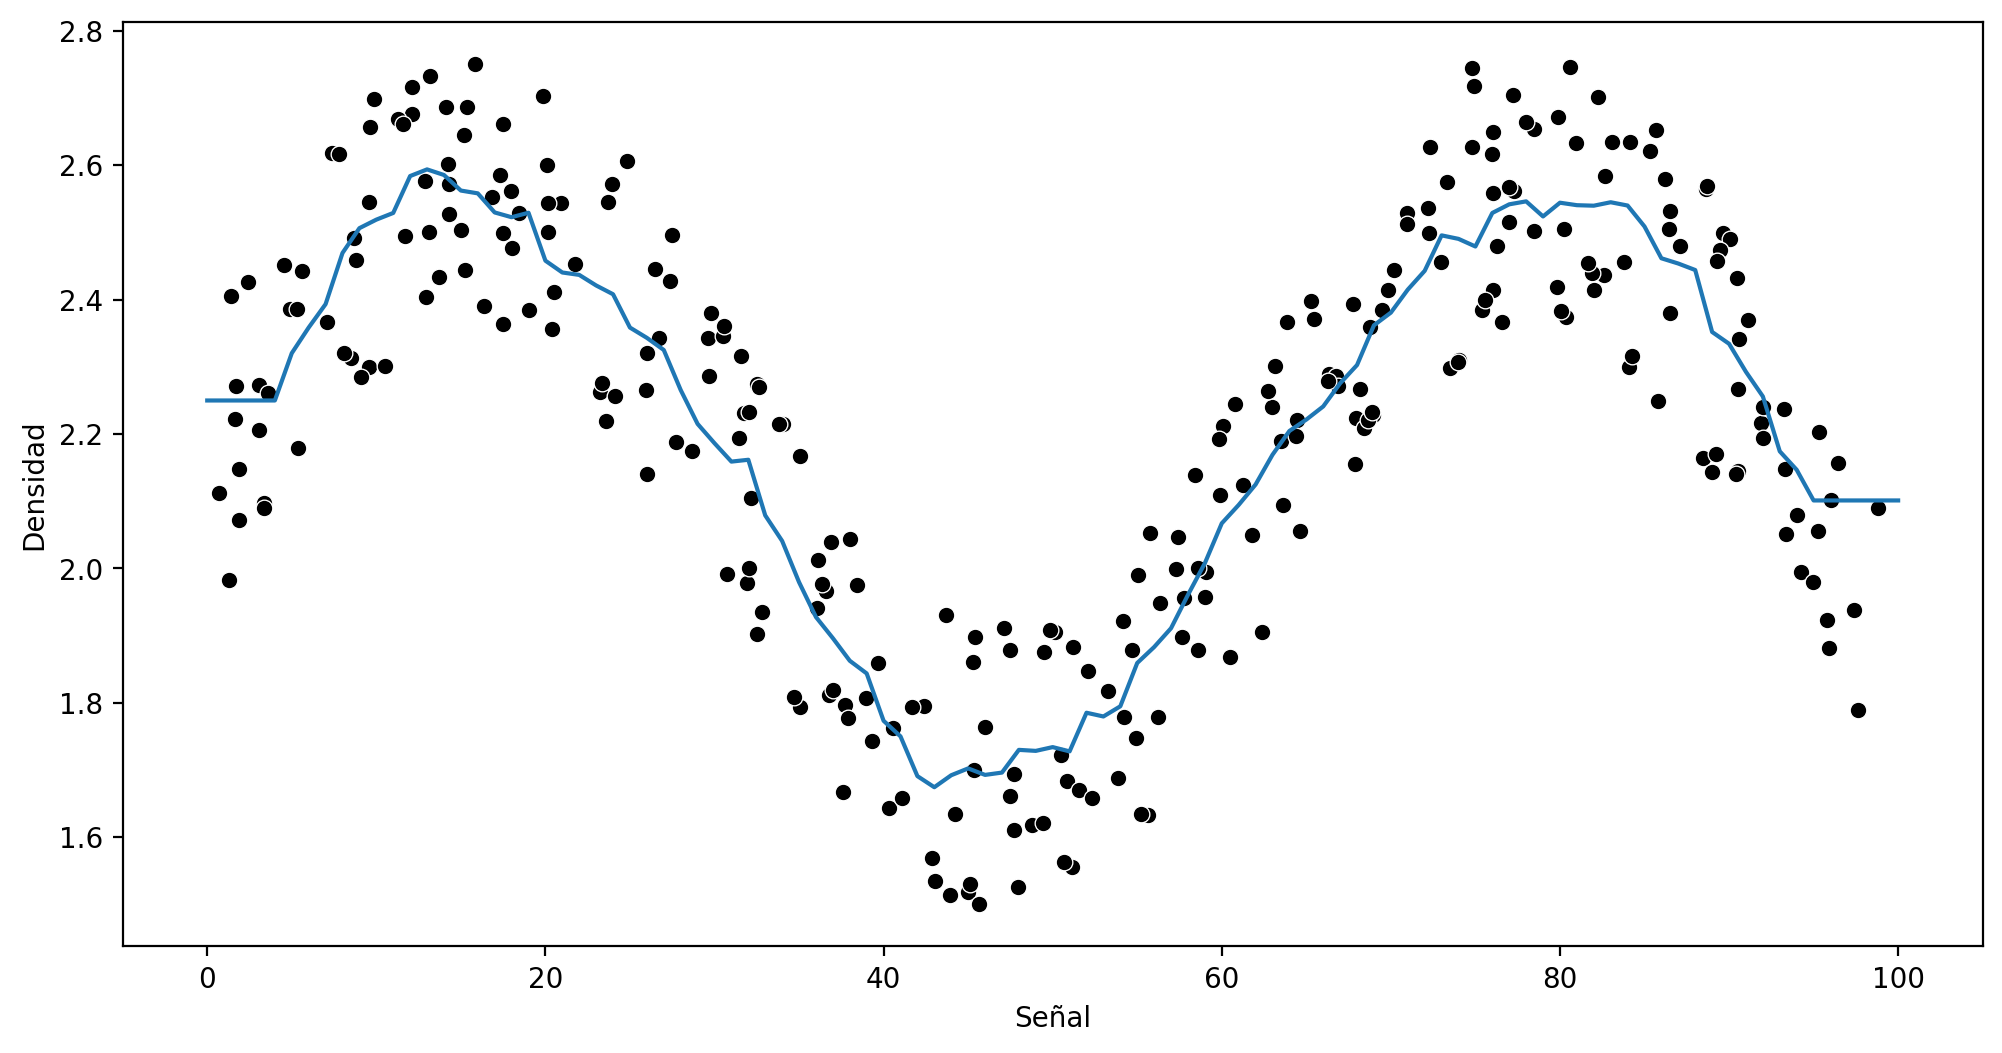

In [37]:
#preds = 
valores_k = [1,5,10,15]
for n in valores_k:
    modelo_knn = KNeighborsRegressor(n_neighbors=n)
    ejecutar_modelo(modelo_knn,X_train, y_train, X_test, y_test)
    

# Regresión con árboles de decisión

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
modelo_ad = DecisionTreeRegressor()

RMSE: 0.1661


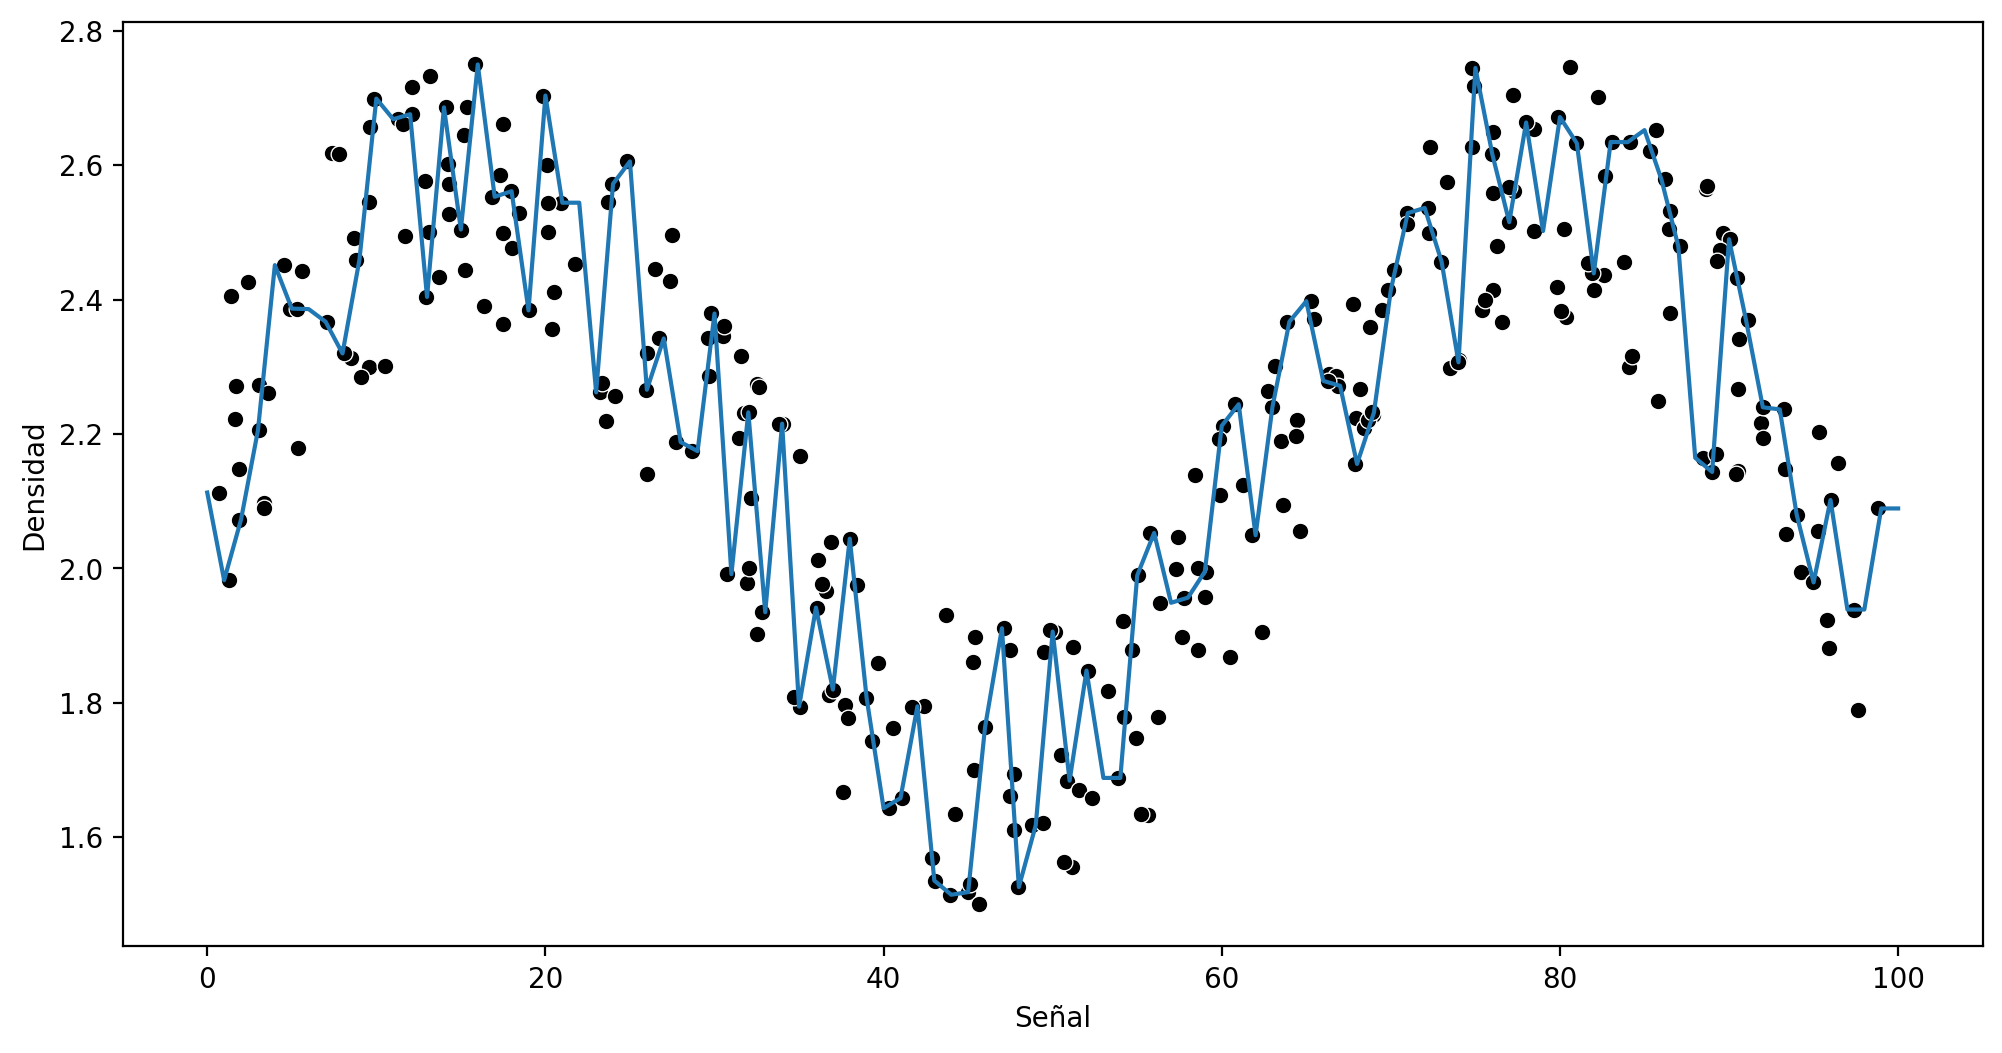

In [41]:
ejecutar_modelo(modelo_ad,X_train, y_train, X_test, y_test)

In [42]:
# Número de hojas del árbol generado
modelo_ad.get_n_leaves()

240

# Regresión con Bosques Aleatorios

In [43]:
from sklearn.ensemble import RandomForestRegressor

RMSE: 0.1493
RMSE: 0.1481
RMSE: 0.1468


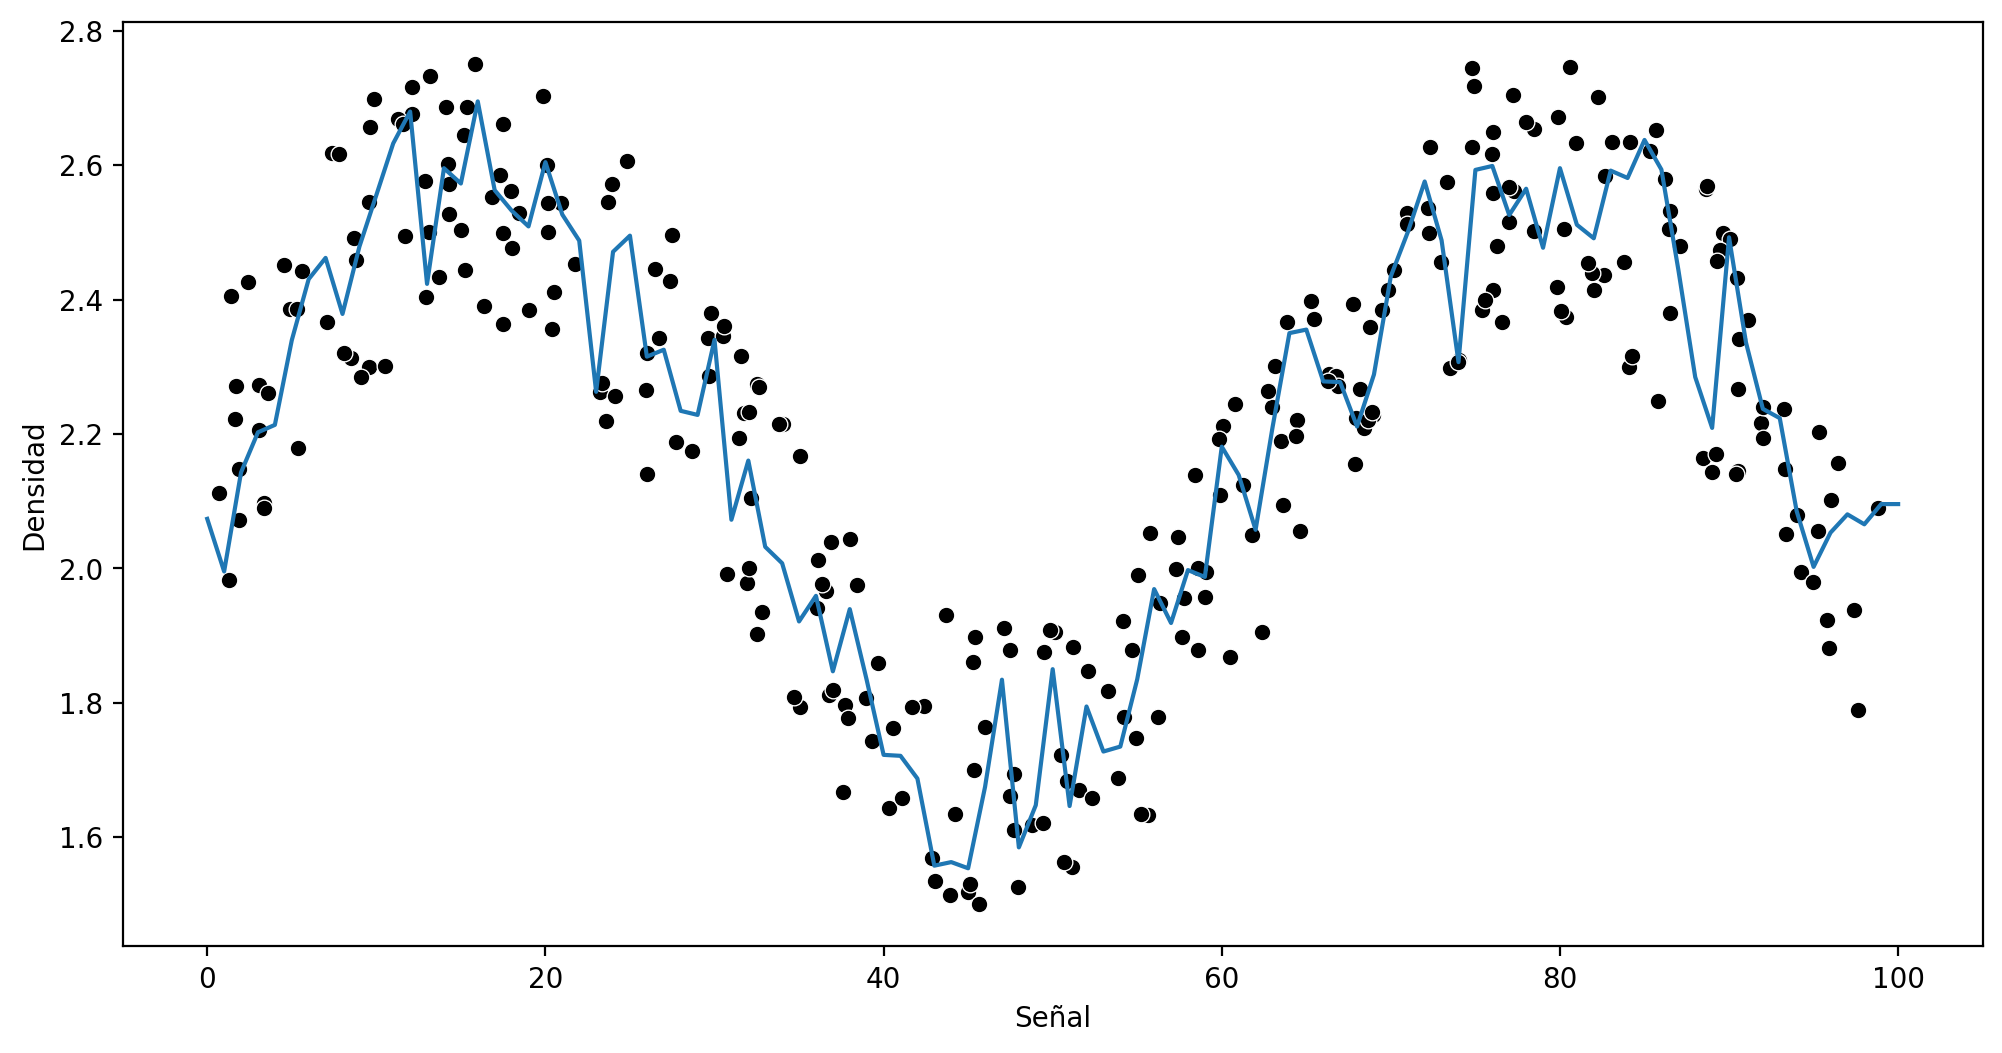

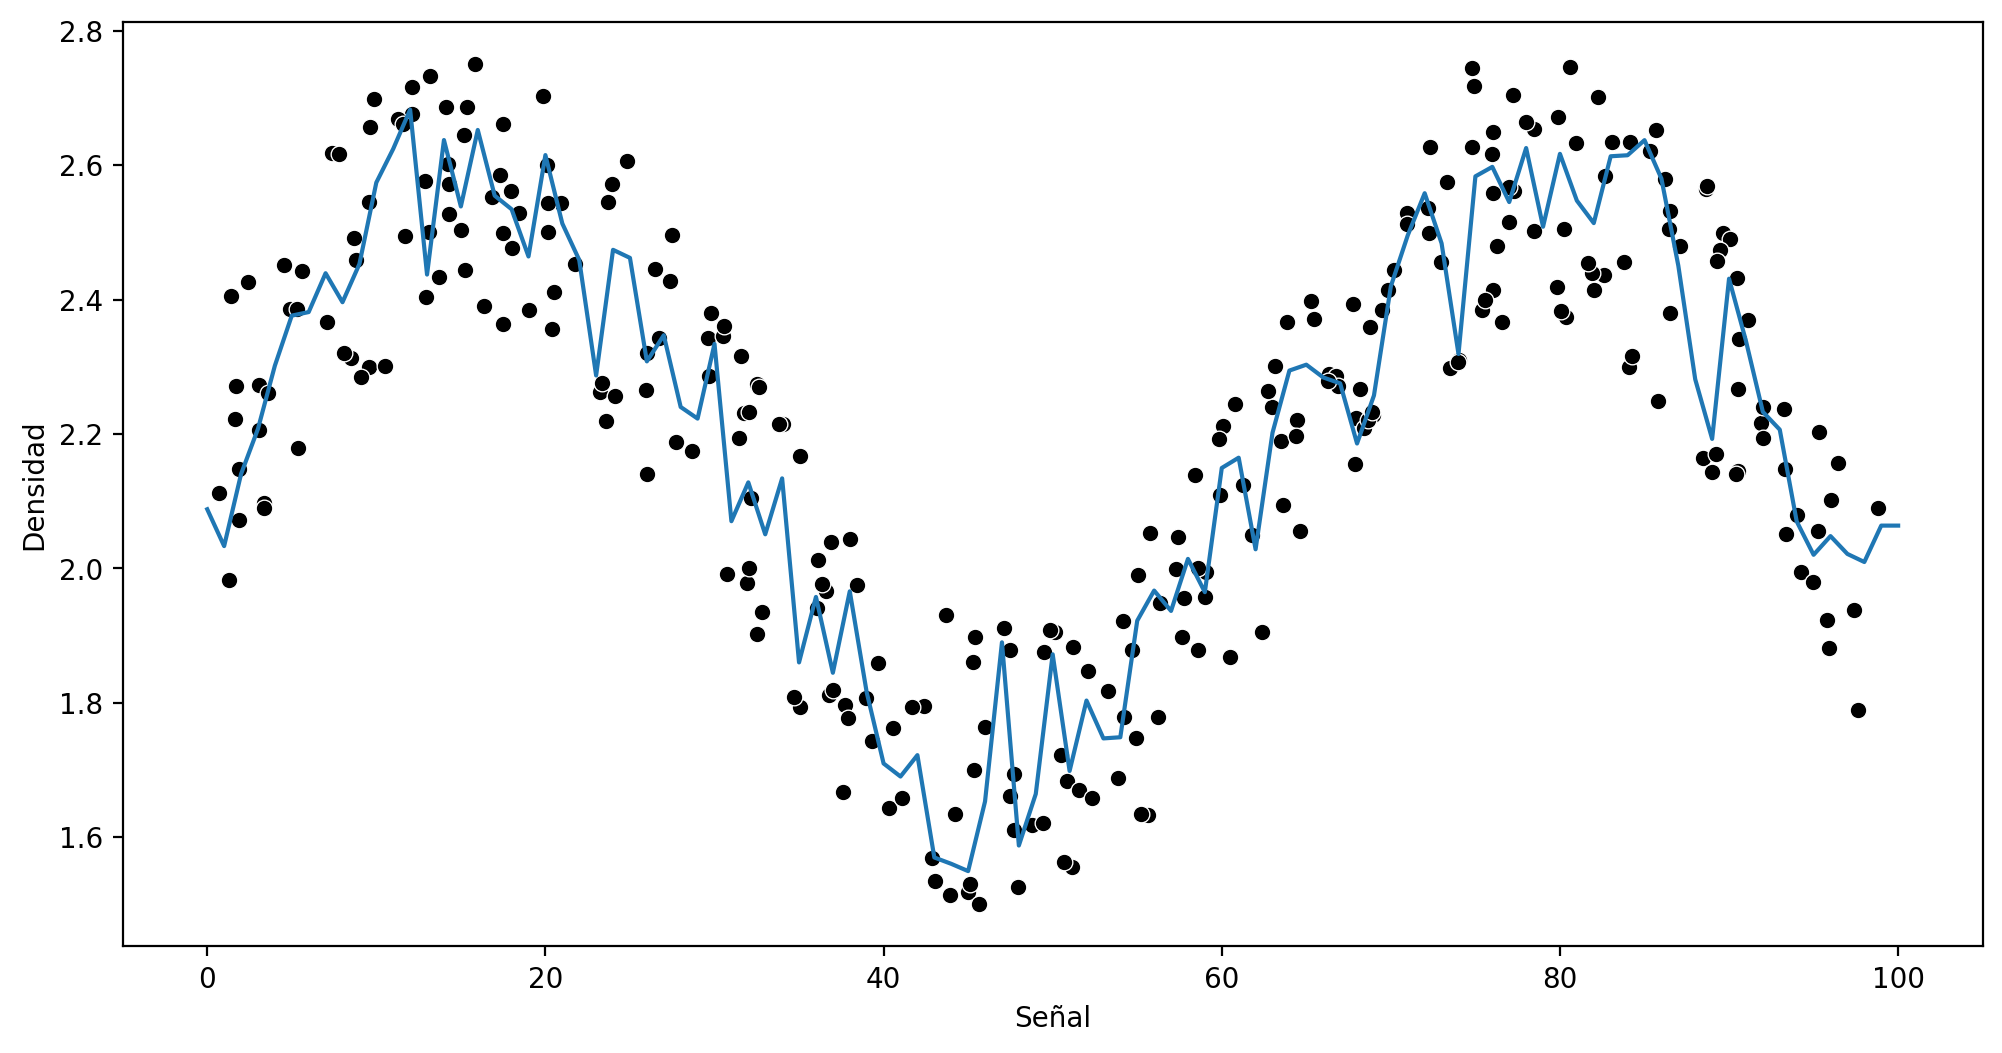

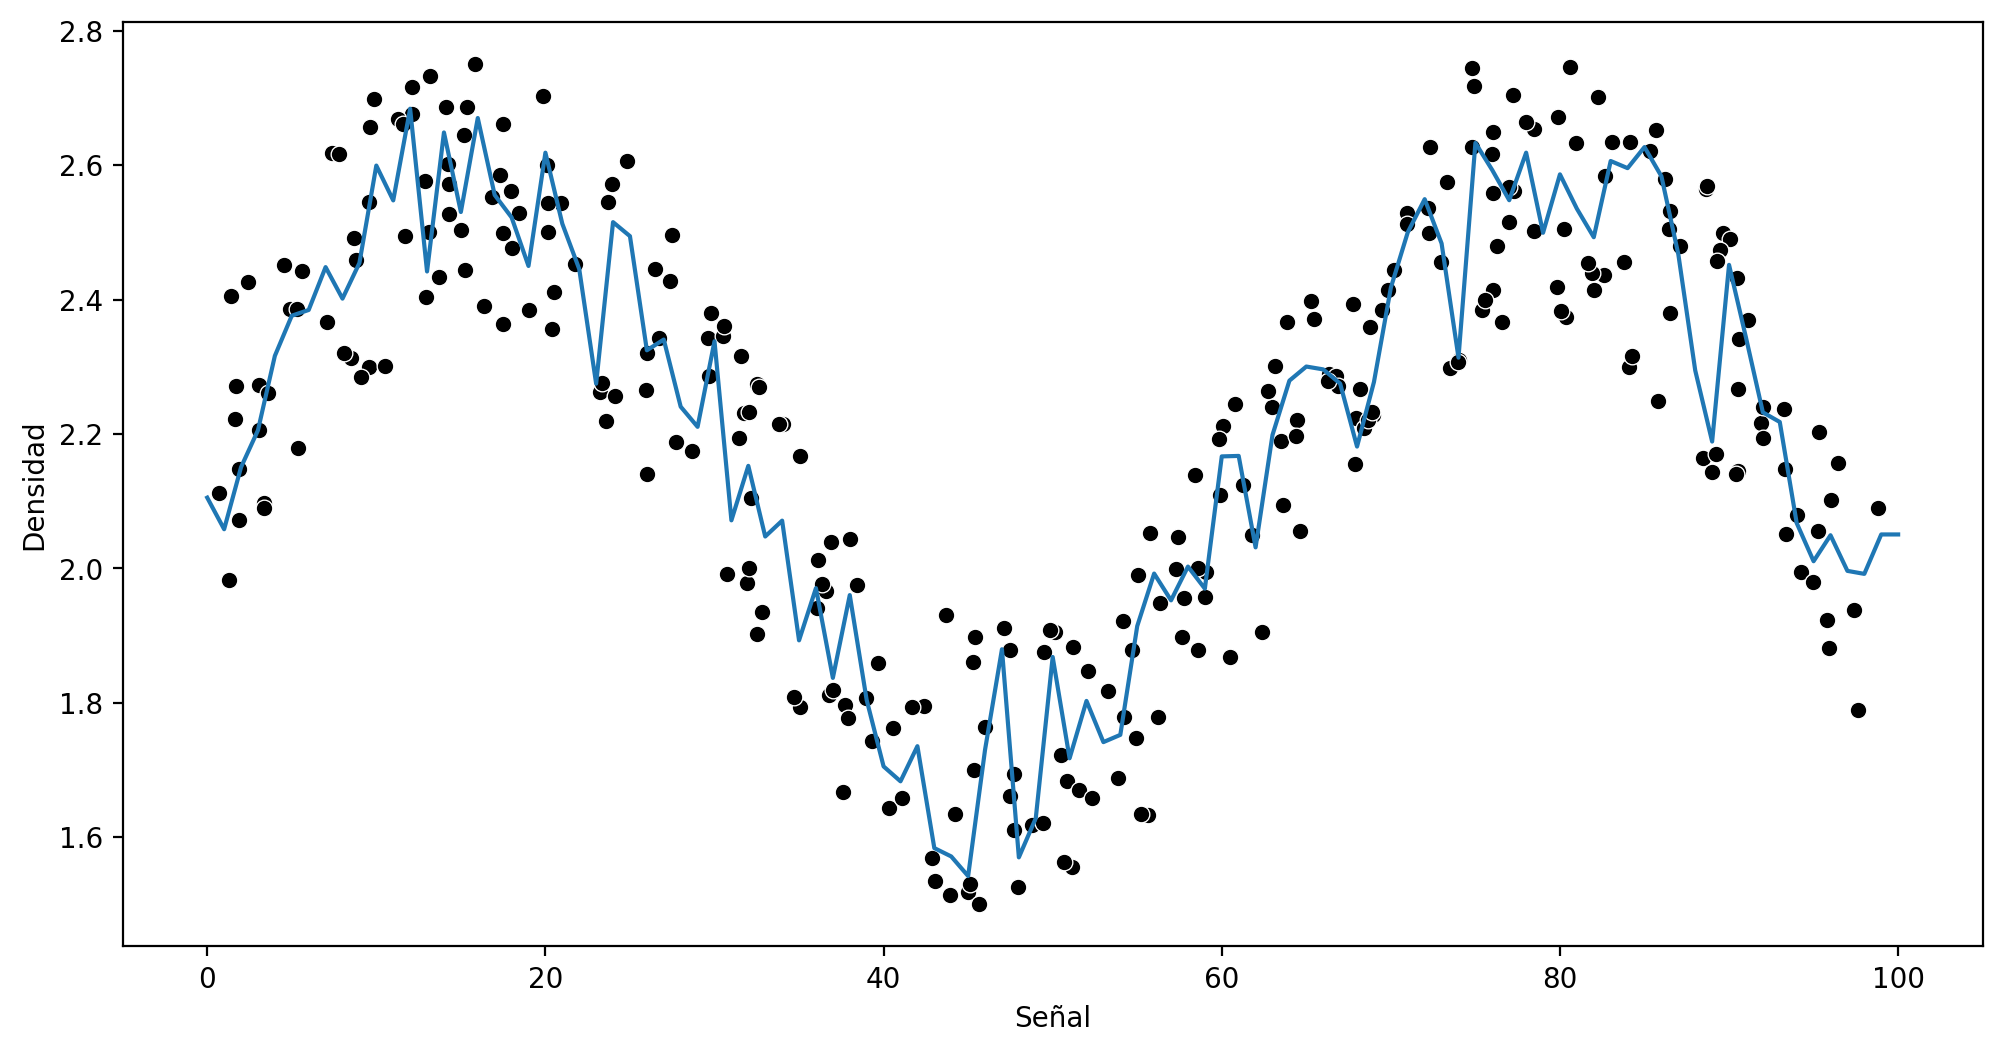

In [44]:
arboles = [10,50,100]
for n in arboles:
    modelo_ba = RandomForestRegressor(n_estimators=n)
    ejecutar_modelo(modelo_ba,X_train, y_train, X_test, y_test)